Explained Variance Ratio: [0.25778078 0.19369998]
Cumulative Explained Variance: [0.25778078 0.45148076]


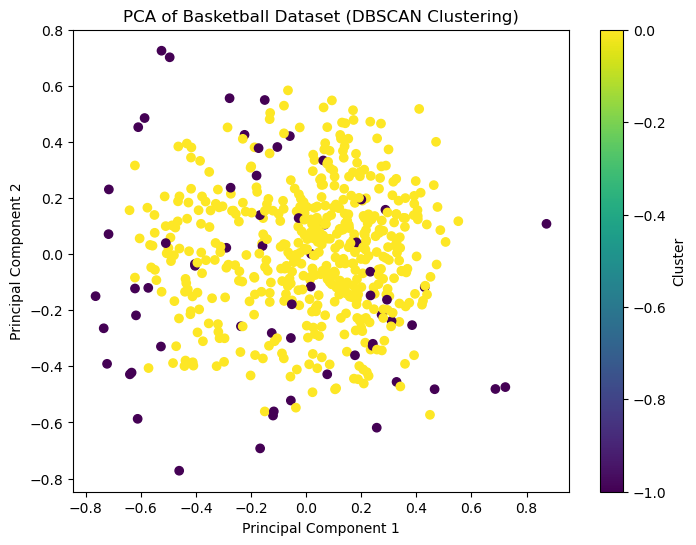

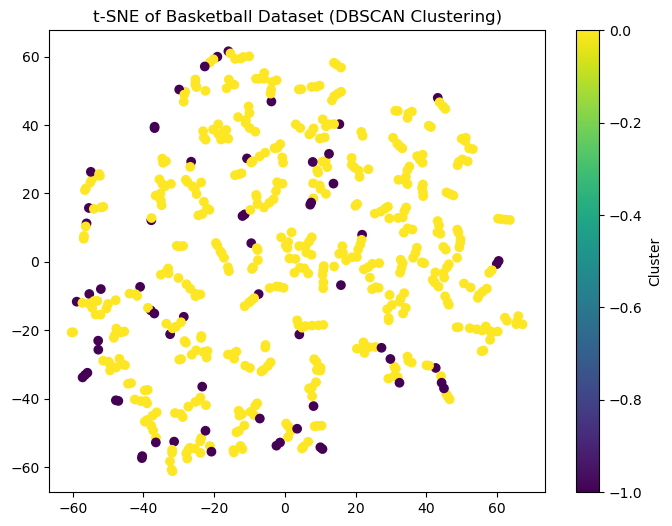

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


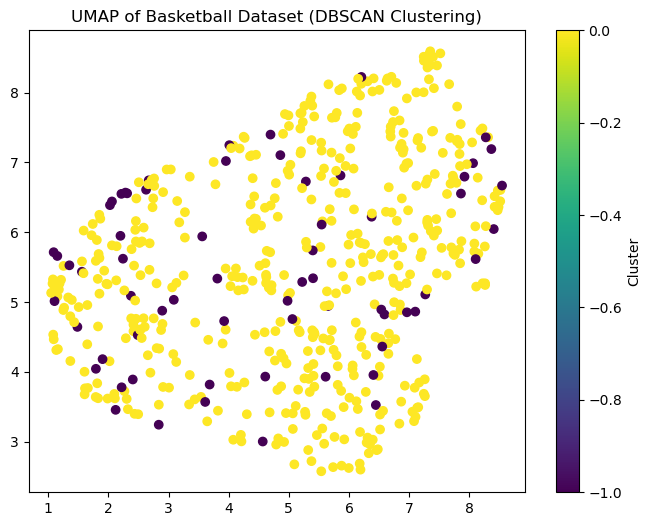

Cluster Distribution (DBSCAN):
Cluster
 0    495
-1     64
Name: count, dtype: int64


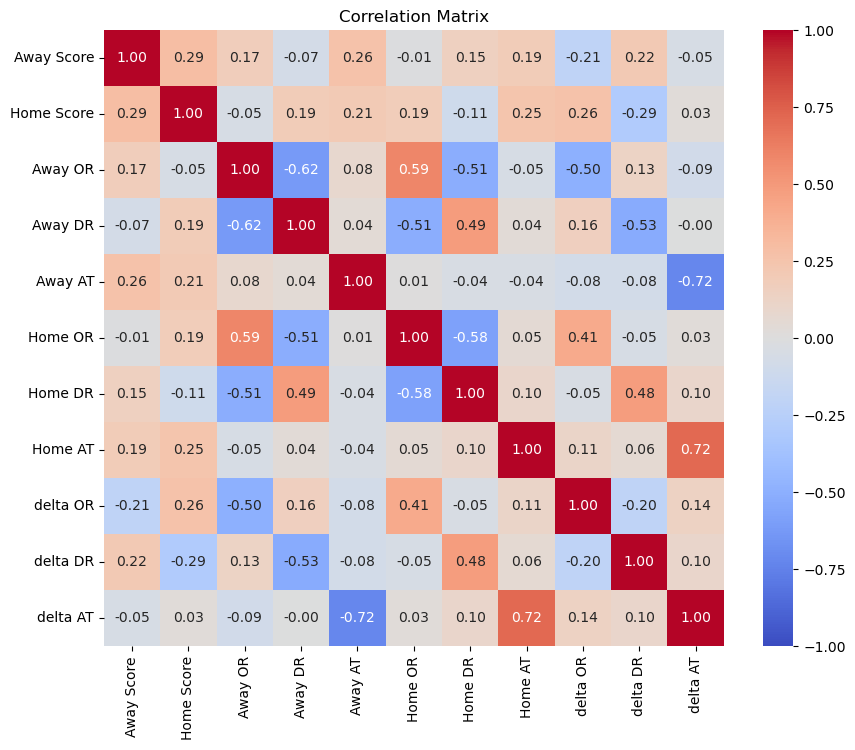

In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/Users/kkelley/Desktop/CBB Results/CBBML.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Round numeric columns to 2 decimal places for clarity
df = df.round(2)

# Select relevant features
features = ['Away Score','Home Score', 'Away OR', 'Away DR', 'Away AT', 
            'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT']

X = df[features]

# Apply Min-Max Scaling (scales values between 0 and 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.35, min_samples=4)  # Adjust parameters as needed
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("PCA of Basketball Dataset (DBSCAN Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=5, learning_rate=100, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("t-SNE of Basketball Dataset (DBSCAN Clustering)")
plt.colorbar(label='Cluster')
plt.show()

# UMAP visualization
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("UMAP of Basketball Dataset (DBSCAN Clustering)")
plt.colorbar(label='Cluster')
plt.show()

# Check number of clusters assigned
print("Cluster Distribution (DBSCAN):")
print(df['Cluster'].value_counts())

# Compute and visualize the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()




